# Bike Sharing Case Study

## Problem Statement:

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands



# Loading Libraries

In [1]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Loading and Understanding the Data

In [2]:
#Loading data
df_bike = pd.read_csv("day.csv")

In [3]:
df_bike.shape

(730, 16)

In [4]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#To check columns present in dataset
print(df_bike.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [6]:
#Understanding data distribution
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#checking for datatypes of columns
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Checking Missing Value

In [8]:
df_bike.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### <font color = 'blue'> Conclusion</font> : 
No missing/NULL values in data

# Dropping of Variables

**In the given dataset we understood that:**<br>
1. **instant** is just an index variable, this column should be removed.
2. **dteday** is date column. But, we already have month and year columns in dataframe. Thus, we can drop dteday columnas it not bringing any new information.
3. addition of **casual** and **registered** columns gives **cnt** column. **cnt** is our target variable. Thus, we are not getting much information from these columns and we will drop these two as well.


In [9]:
# dropping the mentioned variables
df_bike_v1 = df_bike.drop(['instant','dteday','casual','registered'],axis=1)
df_bike_v1.shape

(730, 12)

In [10]:
df_bike_v1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Exploratory Data Analysis and Visualisations

## Understanding Data Types

In [11]:
#check for datatypes
df_bike_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Variable types:
- Binary Types : yr, holiday, workingday
- Categorical Types: season, mnth, weekday, weathersit
- Numeric types: temp, atemp, hum, windspeed, cnt

## Handling Categorical Variables

In [12]:
#We will replace season, weekday, mnth and weathersit with appropriate values

df_bike_v1['season'].replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"},inplace=True)
df_bike_v1['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light_rain_Light_snow+thunderstorm",4:'Heavy Rain_Ice_Pallets_Thunderstorm_Mist'},inplace=True)
df_bike_v1['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df_bike_v1['mnth'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",
                            7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)


In [13]:
df_bike_v1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
df_bike_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Visualising Numeric Variables : Using a pairplot

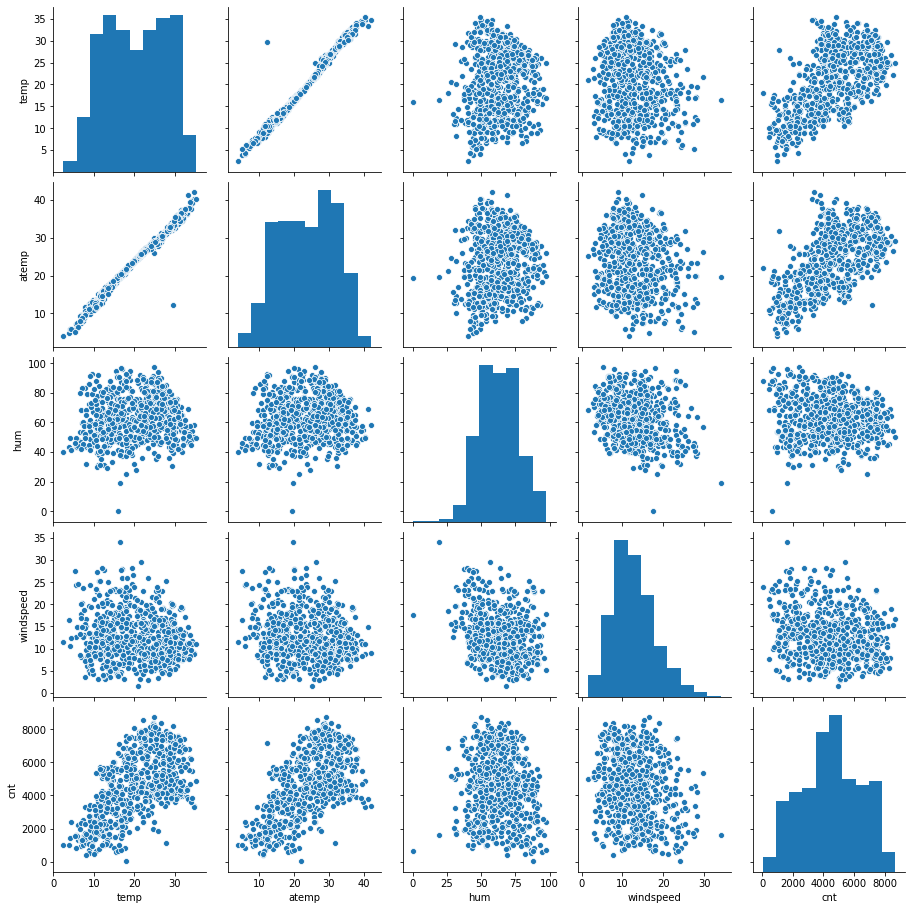

In [15]:

sns.pairplot(df_bike_v1, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.savefig('pair_plot.jpg')

plt.show()

### <font color = 'blue'> Conclusion</font> : 
By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .

## Correlation of Numerical Variable : Using a Heatmap

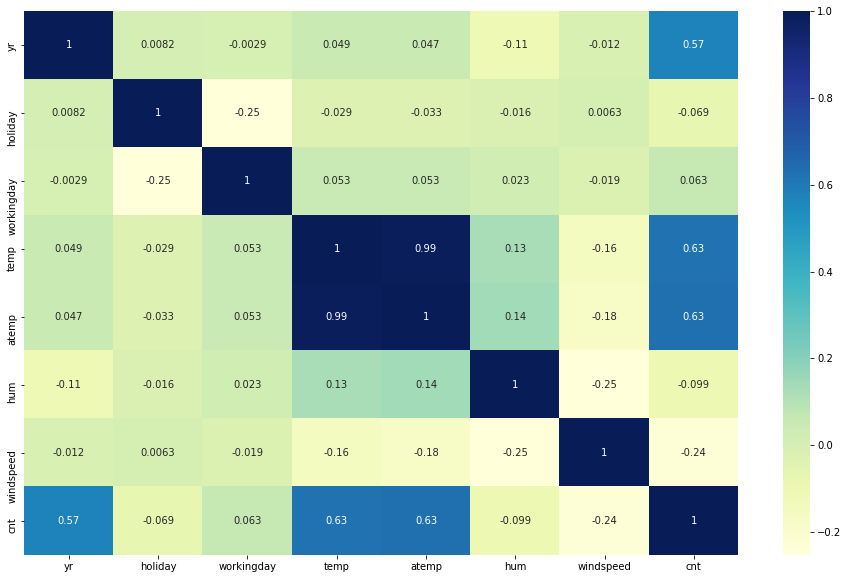

In [16]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_bike_v1.corr(), annot = True, cmap="YlGnBu")
plt.show()



### <font color = 'blue'> Conclusion</font> : 
correlation between temp and atemp is 0.99 which is almost 1. Therefore, we need to drop either of them before proceeding further

In [17]:
#Let us drop temp and consider atemp

df_bike_v1.drop(['temp'],axis=1,inplace=True)
df_bike_v1.shape


(730, 11)

## Visualising Categorical Variables : Using Boxplots

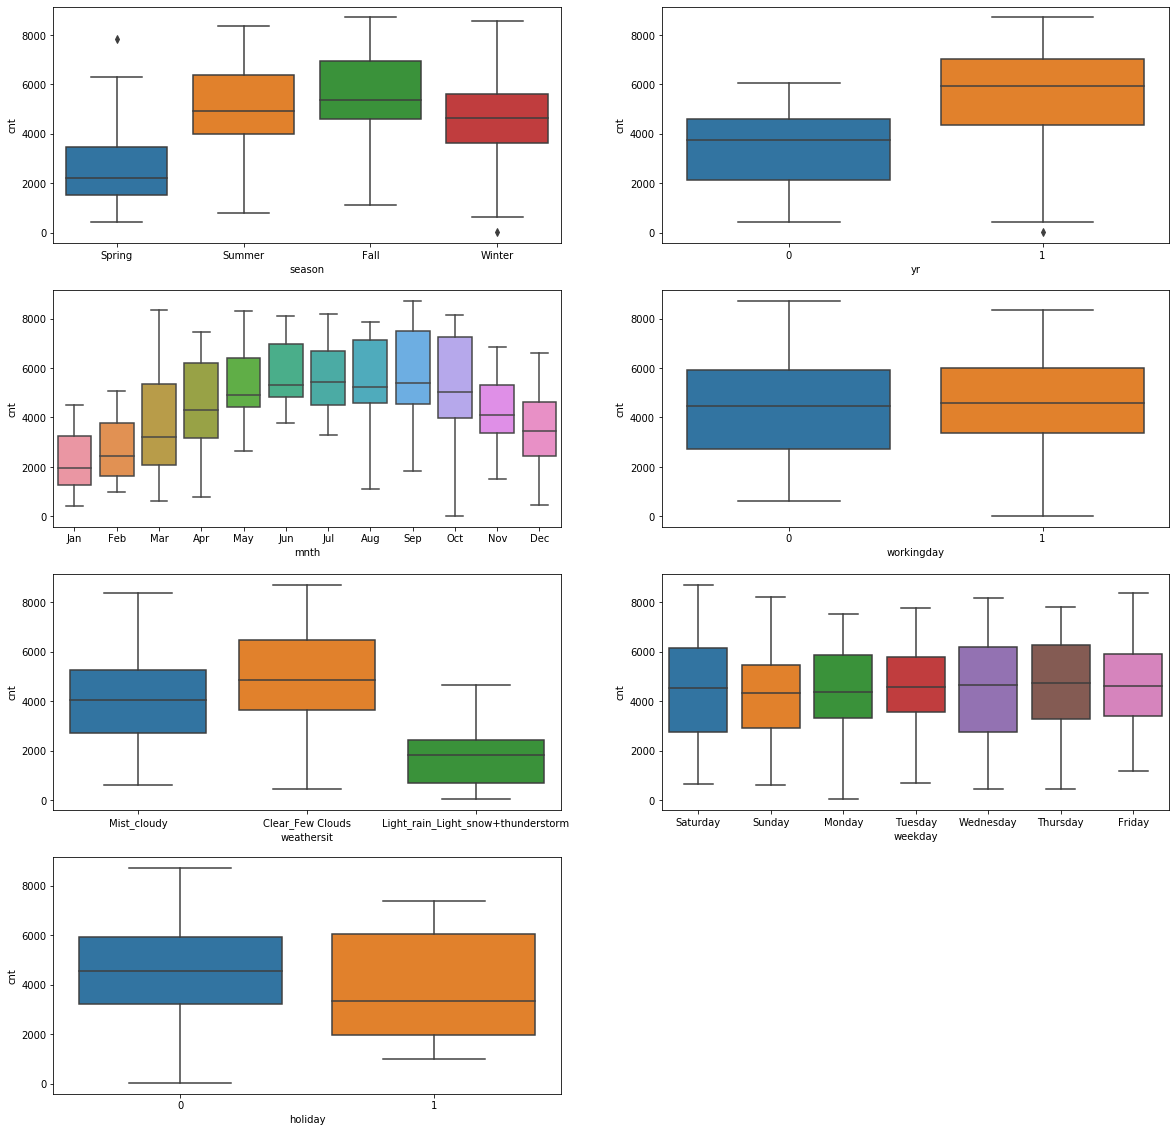

In [18]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(20, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike_v1)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike_v1)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike_v1)
plt.subplot(4,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike_v1)
plt.subplot(4,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike_v1)
plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike_v1)
plt.subplot(4,2,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike_v1)
plt.savefig('categorical_plots.jpg')
plt.show()


### <font color = 'blue'> Conslusions: </font>

- **Season:** In the season plot we can clearly see, the category 3 : Fall, has the highest median, which shows that the demand was high during this season, followed by Summer and Winter. It is least for Spring .


- **Year:** From the year plot we can say, average rented bikes has increased in 2019 almost double that of 2018.


- **Months:** We can see a similar average count of rented bikes in June, July, August & September, followed by May & October. Company should make sure they prepare with high availability during these month. December, January, February have the least demand probably due to winter season.


- **Working day:** There are similar demands whether it's a working day or not.


- **Weather:** We clearly see that there is more demand when Weather is Clear. The count of total users is in between 4000 to 6000 during clear weather. Company should leverage and look up for forecast of weather to fullfill demands.


- **Weekday:** The bike demand is almost constant throughout the week.


- **Holiday:** There is a decrease of demand if it is a holiday



# Creating Dummy variables for Categorical Data

In [19]:
# list of categorical variables
cat_cols = ['season','weathersit','weekday','mnth']

In [20]:
# creating dataframe of dummhy variables
df_dummy = pd.get_dummies(df_bike_v1[cat_cols], drop_first=True)
df_dummy.shape

(730, 22)

In [21]:
df_dummy.head()

,season_Spring,season_Summer,season_Winter,weathersit_Light_rain_Light_snow+thunderstorm,weathersit_Mist_cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
# Combining both the dataframe, df_bike_v1 and df_dummy

df_bike_v2 = pd.concat([df_bike_v1,df_dummy], axis=1)
df_bike_v2.shape

(730, 33)

In [23]:
# dropping columns from which dummy varibles were created

df_bike_v2.drop(cat_cols, axis=1, inplace = True)
df_bike_v2.shape

(730, 29)

In [24]:
df_bike_v2.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
df_bike_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             730 non-null    int64  
 1   holiday                                        730 non-null    int64  
 2   workingday                                     730 non-null    int64  
 3   atemp                                          730 non-null    float64
 4   hum                                            730 non-null    float64
 5   windspeed                                      730 non-null    float64
 6   cnt                                            730 non-null    int64  
 7   season_Spring                                  730 non-null    uint8  
 8   season_Summer                                  730 non-null    uint8  
 9   season_Winter                                  730 non

# Splitting the Data into Training and Testing Set

In [26]:
# Importing library
from sklearn.model_selection import train_test_split

In [27]:
# Splitting data into Train and Test

df_train, df_test = train_test_split(df_bike_v2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
df_train.shape, df_test.shape

((510, 29), (219, 29))

In [29]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# Feature Scaling : Using MinMaxScaler

In [31]:
# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [32]:
# Applyig MinMaxScaler on Numerical variables
num_cols=['atemp','hum','windspeed','cnt']
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [33]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Setting Model Data

In [35]:
# Dividing training set into X_train and y_train sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


In [36]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Light_rain_Light_snow+thunderstorm,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# Feature Selection : Using RFE

In [38]:
# Importing RFE library for feature selection 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Starting with 15 features

In [39]:
# Using RFE for feature selection and limiting to selecton to 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [41]:
#creating a list of features selected by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 7),
 ('season_Winter', True, 1),
 ('weathersit_Light_rain_Light_snow+thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1)]

In [42]:
# creating a list of features selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Light_rain_Light_snow+thunderstorm',
       'weathersit_Mist_cloudy', 'weekday_Saturday', 'mnth_Dec', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep'],
      dtype='object')

In [43]:
# feature which are not chosen by RFE during feature selection

X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct'],
      dtype='object')

In [44]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.shape

(510, 15)

In [45]:
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,season_Spring,season_Winter,weathersit_Light_rain_Light_snow+thunderstorm,weathersit_Mist_cloudy,weekday_Saturday,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep
653,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0,0,0


## Model 1

In [46]:
# importing statsmodels to add constant/intercept.

import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_lm1).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          9.67e-187
Time:                        18:29:10   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3662      0.032     11.425      0.000       0.303       0.429
yr                                                0.2326      0.008     28.490      0.000       0.217       0.249
holiday                                          -0.0841      0.026     -3.243      0.001      -0.135      -0.033
atemp                                             0.4470      0.035     12.826      0.000       0.379       0.515
hum                                              -0.1477      0.038     -3.874      0.000      -0.223      -0.073
windspeed                                        -0.1692      0.026     -6.498      0.000      -0.220      -0.118
season_Spring                                    -0.1070      0.015     -6.974      0.000      -0.137      -0.077
season_Winter                                     0.0662      0.014      4.703      0.000       0.039       0.094
weathersit_Light_rain_Light_snow+thunderstorm    -0.2504      0.027     -9.381      0.000      -0.303      -0.198
weathersit_Mist_cloudy                           -0.0582      0.011     -5.501      0.000      -0.079      -0.037
weekday_Saturday                                  0.0182      0.011      1.627      0.104      -0.004       0.040
mnth_Dec                                         -0.0485      0.017     -2.791      0.005      -0.083      -0.014
mnth_Jan                                         -0.0515      0.018     -2.836      0.005      -0.087      -0.016
mnth_Jul                                         -0.0679      0.017     -3.935      0.000      -0.102      -0.034
mnth_Nov                                         -0.0502      0.019     -2.689      0.007      -0.087      -0.014
mnth_Sep                                          0.0586      0.016      3.751      0.000       0.028       0.089
==============================================================================
Omnibus:                       73.887   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.568
Skew:                          -0.724   Prob(JB):                     9.28e-43
Kurtosis:                       5.648   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [47]:
# importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
6,season_Winter,2.93
5,season_Spring,2.89
8,weathersit_Mist_cloudy,2.26
0,yr,2.06
13,mnth_Nov,1.82
11,mnth_Jan,1.75
10,mnth_Dec,1.54


In [48]:
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,season_Spring,season_Winter,weathersit_Light_rain_Light_snow+thunderstorm,weathersit_Mist_cloudy,weekday_Saturday,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep
653,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0,0,0


## Model 2

**Removing feature - Humidity (hum) due very high VIF value**

In [49]:
# Drop
X_train_rfe1 = X_train_rfe.drop(['hum'],axis=1)

In [50]:
# importing statsmodels to add constant/intercept.

import statsmodels.api as sm

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe1)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_lm2).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          1.10e-184
Time:                        18:29:14   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2902      0.026     11.288      0.000       0.240       0.341
yr                                                0.2362      0.008     28.711      0.000       0.220       0.252
holiday                                          -0.0847      0.026     -3.222      0.001      -0.136      -0.033
atemp                                             0.4125      0.034     12.073      0.000       0.345       0.480
windspeed                                        -0.1441      0.026     -5.636      0.000      -0.194      -0.094
season_Spring                                    -0.1096      0.016     -7.050      0.000      -0.140      -0.079
season_Winter                                     0.0577      0.014      4.095      0.000       0.030       0.085
weathersit_Light_rain_Light_snow+thunderstorm    -0.2917      0.025    -11.756      0.000      -0.340      -0.243
weathersit_Mist_cloudy                           -0.0819      0.009     -9.329      0.000      -0.099      -0.065
weekday_Saturday                                  0.0205      0.011      1.814      0.070      -0.002       0.043
mnth_Dec                                         -0.0541      0.018     -3.083      0.002      -0.089      -0.020
mnth_Jan                                         -0.0568      0.018     -3.090      0.002      -0.093      -0.021
mnth_Jul                                         -0.0603      0.017     -3.471      0.001      -0.094      -0.026
mnth_Nov                                         -0.0497      0.019     -2.624      0.009      -0.087      -0.012
mnth_Sep                                          0.0553      0.016      3.501      0.001       0.024       0.086
==============================================================================
Omnibus:                       77.462   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.699
Skew:                          -0.762   Prob(JB):                     2.62e-44
Kurtosis:                       5.669   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [51]:
# importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.61
3,windspeed,3.98
5,season_Winter,2.55
4,season_Spring,2.36
0,yr,2.06
12,mnth_Nov,1.80
10,mnth_Jan,1.65
7,weathersit_Mist_cloudy,1.53
9,mnth_Dec,1.46
11,mnth_Jul,1.35


In [52]:
X_train_rfe1.head()

,yr,holiday,atemp,windspeed,season_Spring,season_Winter,weathersit_Light_rain_Light_snow+thunderstorm,weathersit_Mist_cloudy,weekday_Saturday,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.438975,0.255342,1,0,0,1,1,0,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,1,0,0,0,0,0


## Model 3

**Removing feature - 'weekday_Saturday' because p-value > 0.05**

In [53]:
# Drop
X_train_rfe2 = X_train_rfe1.drop(['weekday_Saturday'],axis=1)

In [54]:
# importing statsmodels to add constant/intercept.

import statsmodels.api as sm

# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_lm3).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          3.95e-185
Time:                        18:29:18   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2931      0.026     11.396      0.000       0.243       0.344
yr                                                0.2357      0.008     28.604      0.000       0.220       0.252
holiday                                          -0.0881      0.026     -3.349      0.001      -0.140      -0.036
atemp                                             0.4117      0.034     12.022      0.000       0.344       0.479
windspeed                                        -0.1418      0.026     -5.540      0.000      -0.192      -0.092
season_Spring                                    -0.1096      0.016     -7.036      0.000      -0.140      -0.079
season_Winter                                     0.0580      0.014      4.110      0.000       0.030       0.086
weathersit_Light_rain_Light_snow+thunderstorm    -0.2912      0.025    -11.708      0.000      -0.340      -0.242
weathersit_Mist_cloudy                           -0.0817      0.009     -9.296      0.000      -0.099      -0.064
mnth_Dec                                         -0.0531      0.018     -3.020      0.003      -0.088      -0.019
mnth_Jan                                         -0.0562      0.018     -3.053      0.002      -0.092      -0.020
mnth_Jul                                         -0.0598      0.017     -3.432      0.001      -0.094      -0.026
mnth_Nov                                         -0.0501      0.019     -2.640      0.009      -0.087      -0.013
mnth_Sep                                          0.0557      0.016      3.514      0.000       0.025       0.087
==============================================================================
Omnibus:                       71.564   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.324
Skew:                          -0.692   Prob(JB):                     1.05e-42
Kurtosis:                       5.680   Cond. No.                         15.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [55]:
# importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,season_Winter,2.55
4,season_Spring,2.35
0,yr,2.06
11,mnth_Nov,1.80
9,mnth_Jan,1.65
7,weathersit_Mist_cloudy,1.53
8,mnth_Dec,1.46
10,mnth_Jul,1.35


In [56]:
X_train_rfe2.head()

,yr,holiday,atemp,windspeed,season_Spring,season_Winter,weathersit_Light_rain_Light_snow+thunderstorm,weathersit_Mist_cloudy,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep
653,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,0.766351,0.264686,0,0,0,0,0,0,1,0,0
426,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0,0
728,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,1,0,0,0,0,0


## The above model looks good, as there is :
**1. Low Multicollinearity between the predictors as the VIF < 5 <br> 2.  p-values for all the predictors seems to be significant i.e p-value < 0.05.**

### For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).



## Model 3 Coeffeicints : 
    
- atemp : 0.4117
- const : 0.2931
- yr : 0.2357
- season_Winter : 0.058
- mnth_Sep : 0.0557
- mnth_Nov : -0.0501
- mnth_Dec : -0.0531
- mnth_Jan : -0.0562
- mnth_Jul : -0.0598
- weathersit_Mist_cloudy : -0.0817
- holiday : -0.0881
- season_Spring : -0.1096
- windspeed : -0.1418
- weathersit_Light_rain_Light_snow+thunderstorm : -0.2912


**F Statistics** : F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 194.5
- Prob (F-statistic): 3.95e-185

**The F-Statistics value of 194.5 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant**

### The equation for best fitted line based on Model 3:


$Count = 0.2931 + (atemp * 0.4117) + (yr * 0.2357) + (Season Winter * 0.058) + (Month Sep * 0.0557) - (Month Nov * 0.0501) - (Month Dec * 0.0531) - (Month Jan * 0.0562) - (Month Jul * 0.0598) - (Weather Mist Cloudy *  0.0817) - (Holiday * 0.0881) - (Season Spring * 0.1096) - (Windspeed * 0.1418) - (Weather Light Rain/Snow/Thunderstorm * 0.2912) $

# Validating Assumptions of Linear Regression

## 1. Error terms are normally distributed with mean zero

In [57]:
#Predict values
y_train_pred = lm.predict(X_train_lm3)

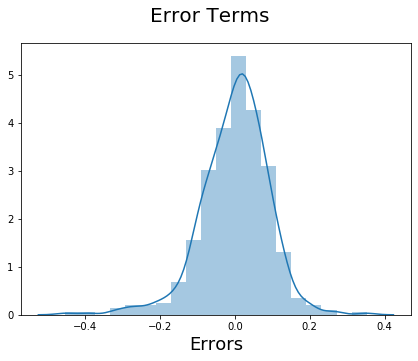

In [58]:
# residual calculations
res = y_train - y_train_pred

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)               # X-label
plt.show()

### <font color = 'blue'> Conclusion</font> : 
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## 2. Check for Homoscedasticity

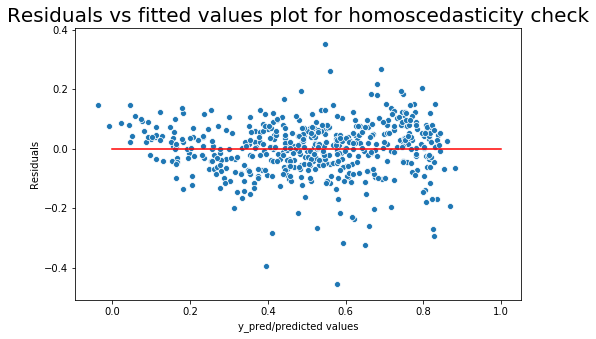

In [59]:
# Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

### <font color = 'blue'> Conclusion</font> : 
- From the above plot, we can see that residuals have equal or almost equal variance across the regression line.

## 3. Linearity

Linear regression needs the relationship between the independent and dependent variables to be linear. 
We visualised the numeric variables using a pairplot to see if the variables are linearly related or not. 


## 4. No multicollinearity 

We have checked VIF value of our Variables. VIF < 5.

# Making Prediction Using Final Model on Test Data
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (Model 3)

**Applying the scaling on the test sets**
- We will only use **scaler.transform**, as we want to use the metrics that model learned from the training data to be applied on the test data.

In [60]:
# Apply scaler() to all numeric variables in test dataset. 

df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.shape

(219, 29)

In [61]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [62]:
# checking all columns of test data after scaling
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# Dividing test set into X_test and y_test sets for the model building

y_test = df_test.pop('cnt')
X_test = df_test

print(y_test.shape)
print(X_test.shape)

(219,)
(219, 28)


In [64]:
#Selecting the variables that were part of final model (Model 3).
col_test = X_train_rfe2.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm3 = sm.add_constant(X_test)

X_test_lm3.shape

(219, 14)

In [65]:
X_test_lm3.head()

,const,yr,holiday,atemp,windspeed,season_Spring,season_Winter,weathersit_Light_rain_Light_snow+thunderstorm,weathersit_Mist_cloudy,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep
184,1.0,0,1,0.769660,0.084219,0,0,0,1,0,0,1,0,0
535,1.0,1,0,0.842587,0.153728,0,0,0,0,0,0,0,0,0
299,1.0,0,0,0.496145,0.334206,0,1,0,1,0,0,0,0,0
221,1.0,0,0,0.795343,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.741471,0.537414,0,0,0,0,0,0,0,0,0


In [66]:
# Making predictions using the final model (lm)

y_test_pred = lm.predict(X_test_lm3)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

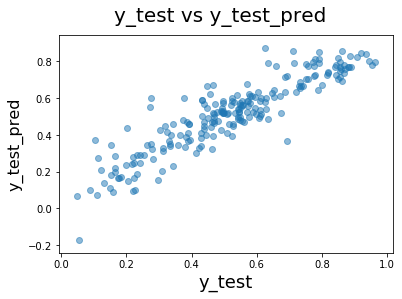

In [67]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

**We can see there is linear relationship between y_test and y_test_pred**

## Residual Analysis

In [68]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 81.8
Train data r^2 : 83.6


## Adjusted R^2 Value for TEST

$Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)$

In [69]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe2.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe2.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 80.64
Train data adjusted r^2 : 83.17


# Final Conclusions

## Result Comparison: 

- Test data r^2 : 81.8
- Train data r^2 : 83.6

- Test data adjusted r^2 : 80.64
- Train data adjusted r^2 : 83.17

Therefore, this seems to be a really good model.

## Interpretation of Coefficients:

- **const**: The Constant value of ‘0.2931’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike demand still will be 0.2931 units.
 
- **atemp**: A coefficient value of ‘0.4117’ indicate a unit increase in atemp variable,  increases the bike demand by 0.4117 units
 
- **yr**: A coefficient value of ‘0.2357’ indicate a unit increase in yr 2019 variable,  increases the bike demand by 0.2357 units
 
- **season_Winter**: A coefficient value of ‘0.058’ indicate a unit increase in Winter variable,  increases the bike demand by 0.058 units
 
- **mnth_Sep**: A coefficient value of ‘0.0557’ indicate a unit increase in September month variable,  increases the bike demand by 0.0557 units
 
- **weathersit_Light_rain_Light_snow+thunderstormm**: A coefficient value of ‘-0.2912’ indicate a unit increase in Light Rain/Snow+thunderstorm Weather variable,  decreases the bike demand by 0.2912 units
 
- **windspeed**: A coefficient value of ‘-0.1418’ indicate a unit increase in Wind speed variable,  decreases the bike demand by 0.1418 units
 
- **season_Spring**: A coefficient value of ‘-0.1096’ indicate a unit increase in Spring variable,  decreases the bike demand by 0.1096 units
 
- **holiday**: A coefficient value of ‘-0.0881’ indicate a unit increase in Holiday variable,  decreases the bike demand by 0.0881 units
 
- **weathersit_Mist_cloudy**: A coefficient value of ‘-0.0817’ indicate a unit increase in Mist cloudy Weather variable,  decreases the bike demand by 0.0817 units
 
- **mnth_Jul**: A coefficient value of ‘-0.0598’ indicate a unit increase in July month variable,  decreases the bike demand by 0.0598 units
 
- **mnth_Jan**: A coefficient value of ‘-0.0562’ indicate a unit increase in Jan month variable,  decreases the bike demand by 0.0562 units
 
- **mnth_Dec**: A coefficient value of ‘-0.0531’ indicate a unit increase in December month variable,  decreases the bike demand by 0.0531 units
 
- **mnth_Nov**: A coefficient value of ‘-0.0501’ indicate a unit increase in Nov month variable,  decreases the bike demand by 0.0501 units
 

## Recommendations to the company:

- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- Year 2019 saw more increase in demands than 2018
- In spring season, the bike demands drop.
- If the Weather is bad i.e. Light Snow, Light Rain + thunderstorm, bike demands are likely to drop. 